# Simple Linear Regression

pandas provides excellent data reading and querying module, dataframe which allows you to import data like SQL- queries

Below is imported house price records from Trulia. 

In [11]:
import pandas
df = pandas.read_excel('house_price.xlsx')
df[:10]

,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views
0,993,229900,3,2,single-family home,10018,2002,1541,77,1357
1,994,149900,4,2,single-family home,8712,1975,1810,5,1282
2,995,229900,3,2,single-family home,13504,1988,1456,76,947
3,996,359000,5,4,single-family home,10130,1997,2903,79,951
4,999,394000,3,2,single-family home,18295,2001,2616,73,709
5,1000,349900,3,2,single-family home,204732,1967,3850,42,366
6,1002,148500,3,1,single-family home,9147,1959,1000,17,328
7,1003,134900,2,2,townhouse,2300,1994,920,56,328
8,1004,265000,3,3,single-family home,13939,1998,2705,12,362
9,1005,149900,4,3,townhouse,2291,1999,1440,4,137


# Prepare the data 

We want to use the price as the dependent variable and the area as the independent variable, i.e., use the house areas to predict the house prices

In [12]:
X = df['area']
print (X[:10])
X_reshape = X.values.reshape(-1,1) # reshape the X to a 2D array
print (X_reshape[:10])
y = df['price']

0    1541
1    1810
2    1456
3    2903
4    2616
5    3850
6    1000
7     920
8    2705
9    1440
Name: area, dtype: int64
[[1541]
 [1810]
 [1456]
 [2903]
 [2616]
 [3850]
 [1000]
 [ 920]
 [2705]
 [1440]]


sklearn provides a split function that can split the data into training data and testing data.

In [13]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshape,y, test_size = 0.3) # put 30% data as the testing data

print ('number of training data:',len(X_train),len(y_train))
print ('number of testing data:',len(X_test),len(y_test))

number of training data: 28 28
number of testing data: 13 13


# Train the model
use the Linear Regression to estimate parameters from the training data. 

In [14]:
from sklearn import linear_model
slr = linear_model.LinearRegression() #create an linear regression model objective 

slr.fit(X_train,y_train) # estimate the patameters
print('beta',slr.coef_)
print('alpha',slr.intercept_)

beta [73.5556283]
alpha 173026.555658775


# Evaluate the Model

Let's calculate the mean squared error and the r square of the model

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

y_predict = slr.predict(X_test) # predict the Y based on the model
mean_squared_error = mean_squared_error(y_test,y_predict) # calculate mean square error
r2_score = r2_score(y_test,y_predict) #calculate r square

print ('mean square error:',mean_squared_error )
print ('r square:',r2_score )

mean square error: 48257860298.74796
r square: 0.17768316224050262


# Visualize the model
using matplotlib to visualize the data 

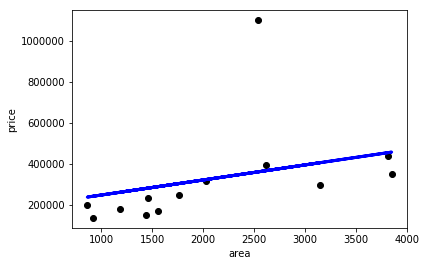

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_test, y_test,  color='black') # create a scatterplot to visualize the test data
plt.plot(X_test, y_predict, color='blue', linewidth=3) # add a line chart to visualize the model

plt.xlabel('area')
plt.ylabel('price')

plt.show()